In [52]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import json
from pyspark.sql import functions as F
from pyspark.sql.functions import array_contains,col
from decimal import Decimal
from pyspark.sql.types import *


In [192]:
telcoChurn = pd.read_csv("Telco-Customer-Churn.csv")

In [193]:
telcoChurn.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [194]:
telcoChurn['tenure'] = telcoChurn.tenure.astype(int)
telcoChurn['MonthlyCharges'] = pd.to_numeric(telcoChurn['MonthlyCharges'], errors='coerce').astype('float')
telcoChurn['TotalCharges'] = pd.to_numeric(telcoChurn['TotalCharges'], errors='coerce').astype('float')

In [195]:
telcoChurn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Data Processing 

In [196]:
#Binning the Tenure data

bins = [0, 12, 24, 48, 60, 100]
group_names = ["0-12 Months", "12-24 Months", "24-48 Months", "48-60 Months", ">60 Months"]
telcoChurn['tenure'] = pd.cut(telcoChurn['tenure'], bins, labels = group_names, right=True).astype(str)



In [197]:
#telcoChurn['tenure'] = telcoChurn.tenure.astype(int)
#telcoChurn['MonthlyCharges'] = pd.to_numeric(telcoChurn['MonthlyCharges'], errors='coerce').astype('float')
#telcoChurn['TotalCharges'] = pd.to_numeric(telcoChurn['TotalCharges'], errors='coerce').astype('float')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns_list = list(telcoChurn.select_dtypes(exclude = numerics).columns)
for each in columns_list:
    le.fit(telcoChurn[each])
    telcoChurn[each] = le.transform(telcoChurn[each])

In [172]:
#Changing the value of SeniorCitizen
#telcoChurn['SeniorCitizen'] = np.where(telcoChurn['SeniorCitizen'] == 1, "Yes", "No")

In [143]:
cols = telcoChurn.columns[1:-1]

In [199]:
telcoChurn.dropna(inplace=True)

In [200]:
#Removing columns with null values
#telcoChurn.dropna(1)
dummies_payment = pd.get_dummies(telcoChurn['PaymentMethod'])
dummies_internet = pd.get_dummies(telcoChurn['InternetService'])
dummies_internet = pd.get_dummies(telcoChurn['InternetService'])

telcoChurn_withDummy = telcoChurn.join([dummies_payment])

In [201]:
#Exploratory Analysis: Correlation matrix
numerics = ['int', 'float', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#telcoChurn.reset_index(inplace=True, drop=True)

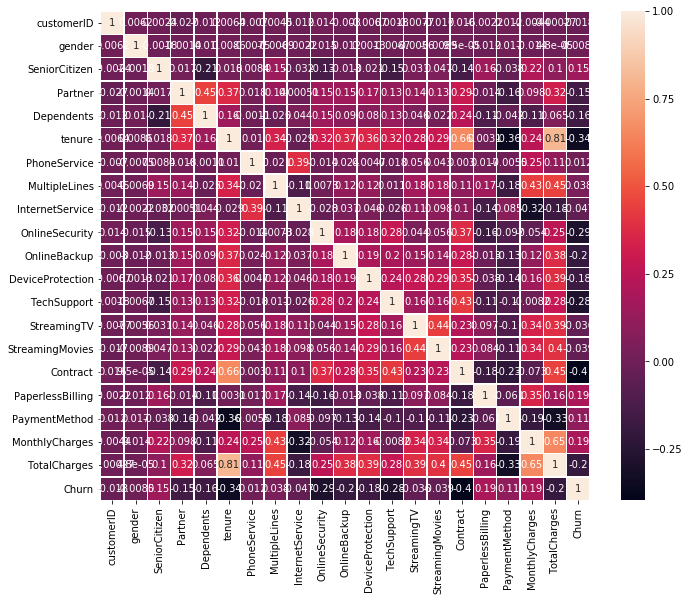

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

telco_numerics = telcoChurn.select_dtypes(include=numerics)
corr = telco_numerics.corr()

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, square=True, linewidths=.5,  annot=True)



In [203]:
from sklearn.model_selection import train_test_split

In [204]:
#numerics = ['int', 'float', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

y = telcoChurn['Churn']
x = telcoChurn.select_dtypes(include=numerics)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,2,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,2,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,6551,0,0,0,0,0,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1002,1,0,0,1,1,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,4770,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,5604,0,0,1,0,2,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,4534,1,0,0,1,4,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [205]:
test_list = ['gender','Dependents','MultipleLines', 'tenure','SeniorCitizen', 'Partner', 'PhoneService', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'OnlineBackup', 'TechSupport']

np.where(telcoChurn == "Yes", 1, 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=0)

In [206]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
result = logisticRegr.fit(x_train, y_train)

In [207]:
cols = x_train.columns.tolist()
dict(zip(cols, np.ravel(result.coef_)))

{'customerID': -0.00012124009104352619,
 'gender': -0.1896858526529273,
 'SeniorCitizen': 0.13117897666455708,
 'Partner': -0.06761119648773682,
 'Dependents': -0.1951394438501572,
 'tenure': -0.6843748248078623,
 'PhoneService': -0.7125377660309469,
 'MultipleLines': -0.018391452358709325,
 'InternetService': -0.10971246856142769,
 'OnlineSecurity': -0.21919834477959535,
 'OnlineBackup': -0.13523372400534772,
 'DeviceProtection': -0.053552620593537714,
 'TechSupport': -0.18564368957771477,
 'StreamingTV': 0.04453670440806273,
 'StreamingMovies': -0.0005680461804574076,
 'Contract': -0.4759911085461034,
 'PaperlessBilling': -0.027885521594669387,
 'PaymentMethod': -0.24374436482908585,
 'MonthlyCharges': -0.011893334117804312,
 'TotalCharges': 0.00042007552412265056,
 'Churn': 8.454192356635495}

In [162]:
telcoChurn = np.where(telcoChurn == "Yes", 1, 0)
telcoChurn = pd.to_numeric(telcoChurn, errors='coerce')

TypeError: arg must be a list, tuple, 1-d array, or Series

In [127]:
logisticRegr.predict(x_test[0:10])

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [128]:
predictions = logisticRegr.predict(x_test)

In [129]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7863733144073811


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1842,  229],
       [ 373,  374]])

## <<< Ignore this section >>>


In [20]:
import numpy as np
data = pd.DataFrame(np.arange(6).reshape((2, 3)), index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))

In [21]:
data


number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [8]:
data.unstack()

number  state   
one     Ohio        0
        Colorado    3
two     Ohio        1
        Colorado    4
three   Ohio        2
        Colorado    5
dtype: int64

In [131]:
import lxml
from bs4 import BeautifulSoup 

df = pd.read_csv('/Users/innocentjr/Desktop/AccessBankSummer2018/ibm', header=0)


In [132]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [133]:
df['b_MultipleLines'] = df.MultipleLines.apply(lambda x: 1 if x == "Yes" else 0)
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [134]:
kmf = KaplanMeierFitter()
T = df['tenure'] #duration
C = df['b_Churn'] # censorship - 1 if death/churn is seen

palette = ['windows blues', 'amber']
sns.set_palette(sns.xkcd_palette(palette))

##Set up plot
ax = plt.subplot(111)
plt.title('Kaplan-Meier Estimate of Driver Retension by Multiple Lines')
sms.set_context("talk")

d={}
vlines=[]
i=0

##Plot fitted graph
#Loop through segmentation variable, plot on same axes
for segment in df.b_MulitpleLine.unique():
    ix = df.b_MultipleLines == segment
    d['kmf{}]'.format(i+1)] = kmf.fit(T.loc[ix], C.loc[x], )

NameError: name 'KaplanMeierFitter' is not defined